# **Import Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
import warnings

# **Upload and Getting to know the data**

In [ ]:
df = pd.read_csv(r"C:\Users\mehem\OneDrive\Desktop\Finally project\networkintrusion.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

# **Statistical information**

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253800e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728493e+05,2.122190e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **EDA**

In [13]:
print(df.shape)

(22544, 40)


In [12]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'num_root', 'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<Axes: title={'center': 'Class paylanması'}, xlabel='class'>

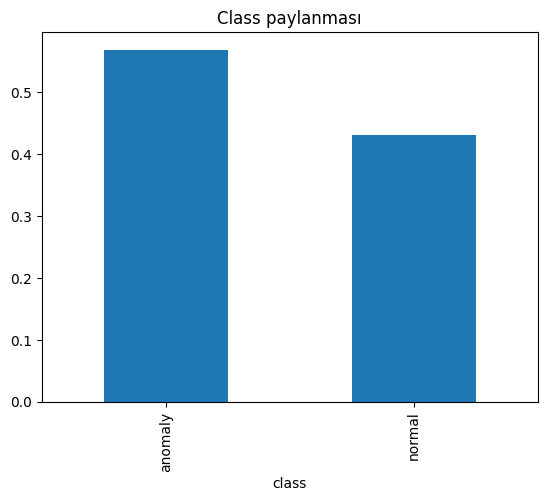

In [15]:
df['class'].value_counts(normalize=True).plot(kind='bar', title='Class paylanması')

In [ ]:
from sklearn.impute import KNNImputer

# 1. Rəqəmsal sütunları seç
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Sadəcə bu sütunlara KNNImputer tətbiq et
imputer = KNNImputer(n_neighbors=3)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [19]:
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'], drop_first=True)

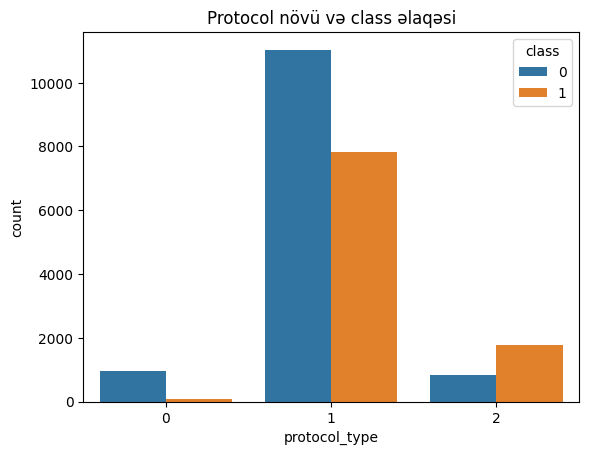

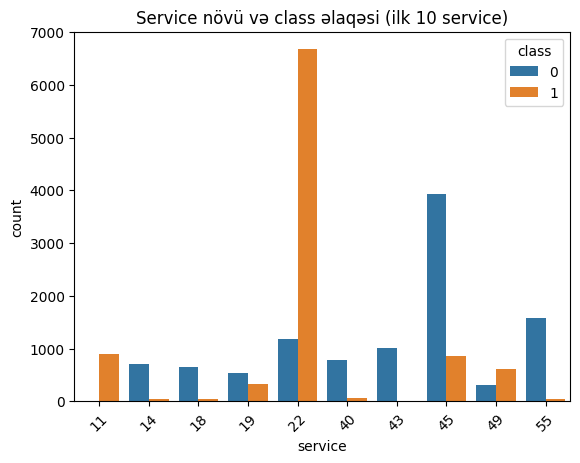

In [ ]:
# Protocol növlərinin class-a görə paylanması
sns.countplot(x='protocol_type', hue='class', data=df)
plt.title("Protocol növü və class əlaqəsi")
plt.show()

# Service növlərinin class-a görə paylanması (ilk 10 növ üçün)
top_services = df['service'].value_counts().head(10).index
sns.countplot(x='service', hue='class', data=df[df['service'].isin(top_services)])
plt.title("Service növü və class əlaqəsi (ilk 10 service)")
plt.xticks(rotation=45)
plt.show()


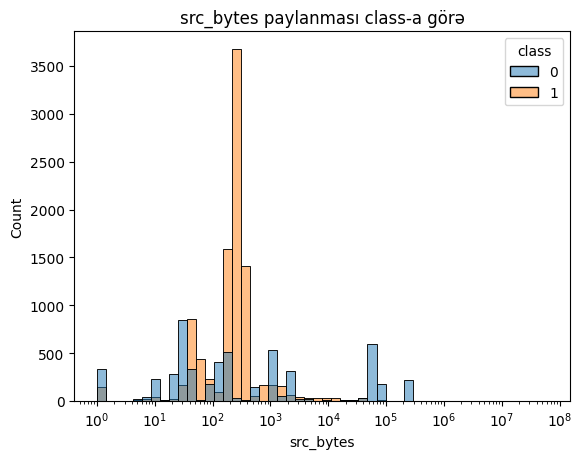

In [ ]:
# src_bytes üçün class-a görə paylanma
sns.histplot(data=df, x='src_bytes', hue='class', bins=50, log_scale=True)
plt.title("src_bytes paylanması class-a görə")
plt.show()

In [ ]:
df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3649
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
num_root                         20
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    75
diff_srv_rate               

In [ ]:
df['class'].value_counts()

class
anomaly    12833
normal      9711
Name: count, dtype: int64

In [ ]:
df['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22544
Name: count, dtype: int64

In [ ]:
df['land'].value_counts()

land
0    22537
1        7
Name: count, dtype: int64

In [ ]:
df['wrong_fragment'].value_counts()

wrong_fragment
0    22444
1       55
3       45
Name: count, dtype: int64

In [ ]:
df['urgent'].value_counts()

urgent
0    22534
1        5
2        4
3        1
Name: count, dtype: int64

In [ ]:
df['hot'].value_counts()

hot
0      21537
2        846
1         90
4         20
3         12
5         11
7          9
6          6
18         3
22         2
30         2
10         2
19         1
11         1
101        1
15         1
Name: count, dtype: int64

In [ ]:
df['num_failed_logins'].value_counts()

num_failed_logins
0    22066
1      473
3        3
2        1
4        1
Name: count, dtype: int64

In [ ]:
df['logged_in'].value_counts()

logged_in
0    12575
1     9969
Name: count, dtype: int64

In [ ]:
df['num_compromised'].value_counts()

num_compromised
0      22175
1        325
2         11
8          4
4          4
5          3
3          3
6          2
49         2
14         2
611        1
165        1
15         1
10         1
11         1
381        1
25         1
796        1
9          1
36         1
23         1
57         1
7          1
Name: count, dtype: int64

In [ ]:
df['root_shell'].value_counts()

root_shell
0    22489
1       55
Name: count, dtype: int64

In [ ]:
df['num_root'].value_counts()

num_root
0      22496
1         14
3          7
4          6
2          4
7          2
8          2
684        1
17         1
173        1
23         1
145        1
26         1
401        1
878        1
31         1
9          1
45         1
51         1
5          1
Name: count, dtype: int64

                        Feature  Importance
37         dst_host_rerror_rate    0.150955
4                     src_bytes    0.149943
9                           hot    0.113469
5                     dst_bytes    0.057933
0                      duration    0.056569
3                          flag    0.053708
1                 protocol_type    0.048491
10            num_failed_logins    0.036252
11                    logged_in    0.033944
12              num_compromised    0.031083
2                       service    0.025095
15                   num_shells    0.023629
28           srv_diff_host_rate    0.022961
33  dst_host_same_src_port_rate    0.022250
36     dst_host_srv_serror_rate    0.021429
38     dst_host_srv_rerror_rate    0.019285
31       dst_host_same_srv_rate    0.017592
18                is_host_login    0.014103
21                    srv_count    0.013548
30           dst_host_srv_count    0.013144
20                        count    0.008819
24                  rerror_rate 

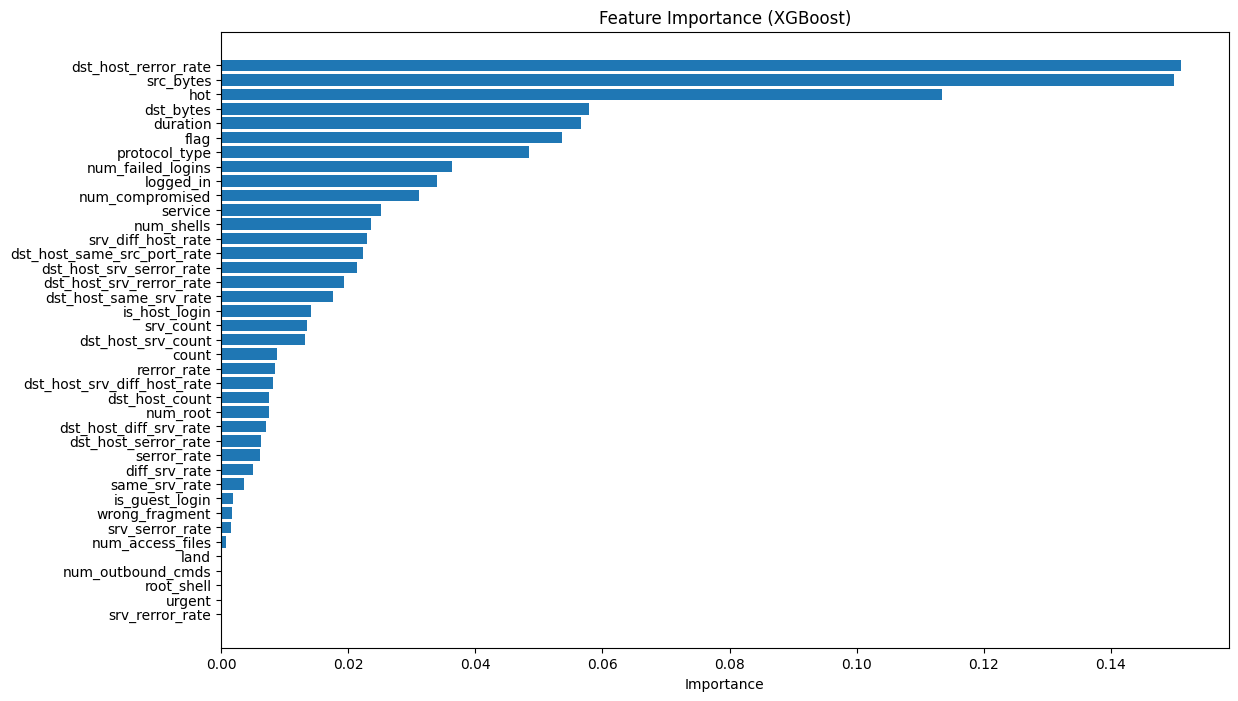

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt


# df = df.fillna(0)

# cat_cols = df.select_dtypes(include=['object']).columns
# le = LabelEncoder()
# for col in cat_cols:
#     df[col] = le.fit_transform(df[col])

# X = df.drop('class', axis=1)
# y = df['class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# model.fit(X_train, y_train)

# importances = model.feature_importances_
# feat_names = X.columns

# feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
# feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# print(feat_imp_df)

# plt.figure(figsize=(13,8))
# plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importance (XGBoost)')
# plt.gca().invert_yaxis()
# plt.show()


In [ ]:
# # Test datası üzərində proqnoz ver
# y_pred = model.predict(X_test)

# # Nəticələri qiymətləndir
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[3809   41]
 [  41 2873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3850
           1       0.99      0.99      0.99      2914

    accuracy                           0.99      6764
   macro avg       0.99      0.99      0.99      6764
weighted avg       0.99      0.99      0.99      6764


Accuracy Score:
0.9878769958604376


In [ ]:
# X = df.drop('class', axis=1)
# y = df['class']

# # Vacib olmayan atributlar
# low_importance_features = [
#     'srv_rerror_rate', 'urgent', 'root_shell', 'num_outbound_cmds', 'land',
#     'num_access_files', 'srv_serror_rate', 'wrong_fragment', 'is_guest_login',
#     'same_srv_rate', 'diff_srv_rate', 'serror_rate', 'dst_host_serror_rate',
#     'dst_host_diff_srv_rate', 'num_root', 'dst_host_count',
#     'dst_host_srv_diff_host_rate', 'rerror_rate'
# ]

# # Onları çıxaq
# X_reduced = X.drop(columns=low_importance_features)

# # Train-test bölməsi
# X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# # Model qur
# model_reduced = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# model_reduced.fit(X_train, y_train)

# # Test et
# y_pred_reduced = model_reduced.predict(X_test)

# # Nəticələr
# print("Confusion Matrix (Reduced Features):")
# print(confusion_matrix(y_test, y_pred_reduced))

# print("\nClassification Report (Reduced Features):")
# print(classification_report(y_test, y_pred_reduced))

# print("\nAccuracy Score (Reduced Features):")
# print(accuracy_score(y_test, y_pred_reduced))

Confusion Matrix (Reduced Features):
[[3789   53]
 [  24 2898]]

Classification Report (Reduced Features):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3842
           1       0.98      0.99      0.99      2922

    accuracy                           0.99      6764
   macro avg       0.99      0.99      0.99      6764
weighted avg       0.99      0.99      0.99      6764


Accuracy Score (Reduced Features):
0.9886162034299231


In [ ]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# # Cross-validation
# cv_scores = cross_val_score(model_reduced, X_reduced, y, cv=5, scoring='accuracy')

# print("Cross-validation scores:", cv_scores)
# print("Mean accuracy:", np.mean(cv_scores))
# print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.99001996 0.99024174 0.98802395 0.98780217 0.98779947]
Mean accuracy: 0.9887774583928859
Standard deviation: 0.0011102563535465779


In [20]:
df['class'] = df['class'].map({'normal': 0, 'anomaly': 1})

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


  File "c:\Users\mehem\OneDrive\Desktop\Machine Learning\env-1\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python310\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[1916   26]
 [  33 2534]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1942
           1       0.99      0.99      0.99      2567

    accuracy                           0.99      4509
   macro avg       0.99      0.99      0.99      4509
weighted avg       0.99      0.99      0.99      4509

Accuracy: 0.9869150587713462


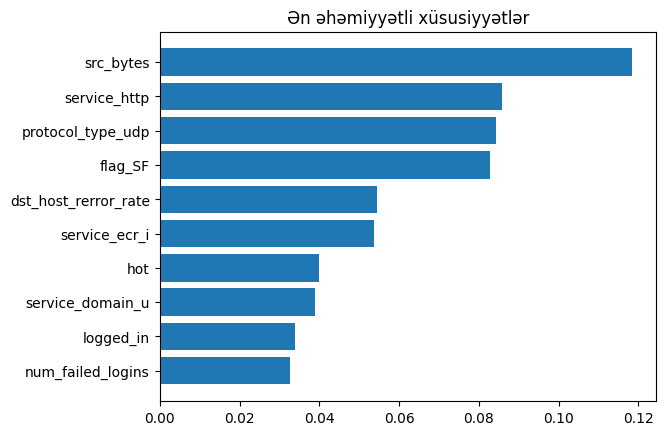

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]  # Top 10
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title("Ən əhəmiyyətli xüsusiyyətlər")
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV scores:", scores)
print("Mean accuracy:", scores.mean())

CV scores: [0.99001996 0.9895764  0.98802395 0.98868929 0.98757764]
Mean accuracy: 0.9887774485535485


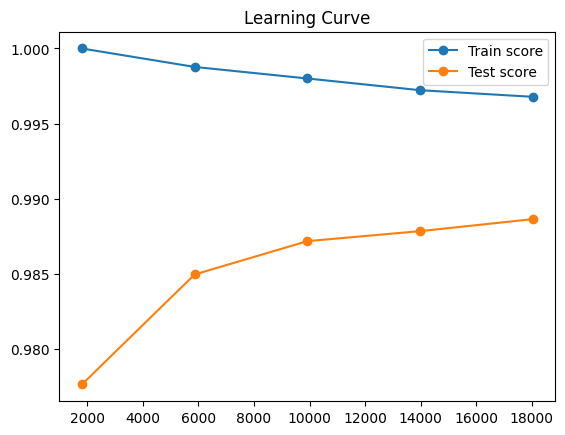

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Train score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Test score")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [31]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']